Replace the PuroR gene in LentiCRISPRv2 with the mCherry in the pcDNA3.1-mCherry via Gibson Assembly

In [1]:
import sys
sys.path = ["/Users/hideto/dropbox/Experiments/Project/Dbrick/github"] + sys.path
import random
import matplotlib
from QUEEN.queen import * 
from QUEEN import cutsite as cs
from QUEEN.qexperiment import pcr, homology_based_assembly, digestion, ligation, goldengate_assembly
matplotlib.rcParams['font.sans-serif'] = ["Helvetica", "Arial", "Lucida Sans", "DejaVu Sans", "Lucida Grande", "Verdana"]
matplotlib.rcParams['font.family']     = 'sans-serif'

<Figure size 100x100 with 0 Axes>

In [2]:
lenticrisprv2 = QUEEN(record="52961", dbtype="addgene", product="lentiCRISPR v2") 
pcdna_mcherry = QUEEN(record="128744", dbtype="addgene", product="pcDNA3.1-mCherry")

In [3]:
primer_pair1 = primerdesign(lenticrisprv2, lenticrisprv2["PuroR",-1])[0] 

In [4]:
backbone = pcr(lenticrisprv2, primer_pair1["fw"], primer_pair1["rv"]) 

In [5]:
primer_pair2 = primerdesign(pcdna_mcherry, pcdna_mcherry["mCherry"],  fw_adapter=backbone, rv_adapter=backbone)[0] 

In [6]:
insert = pcr(pcdna_mcherry,  primer_pair2["fw"], primer_pair2["rv"])

In [7]:
construct = homology_based_assembly(backbone, insert, mode="gibson")

In [8]:
construct["Cas9", "mCherry"]

<queen.QUEEN object; project='lentiCRISPR v2_7', length='5326 bp', topology='linear'>

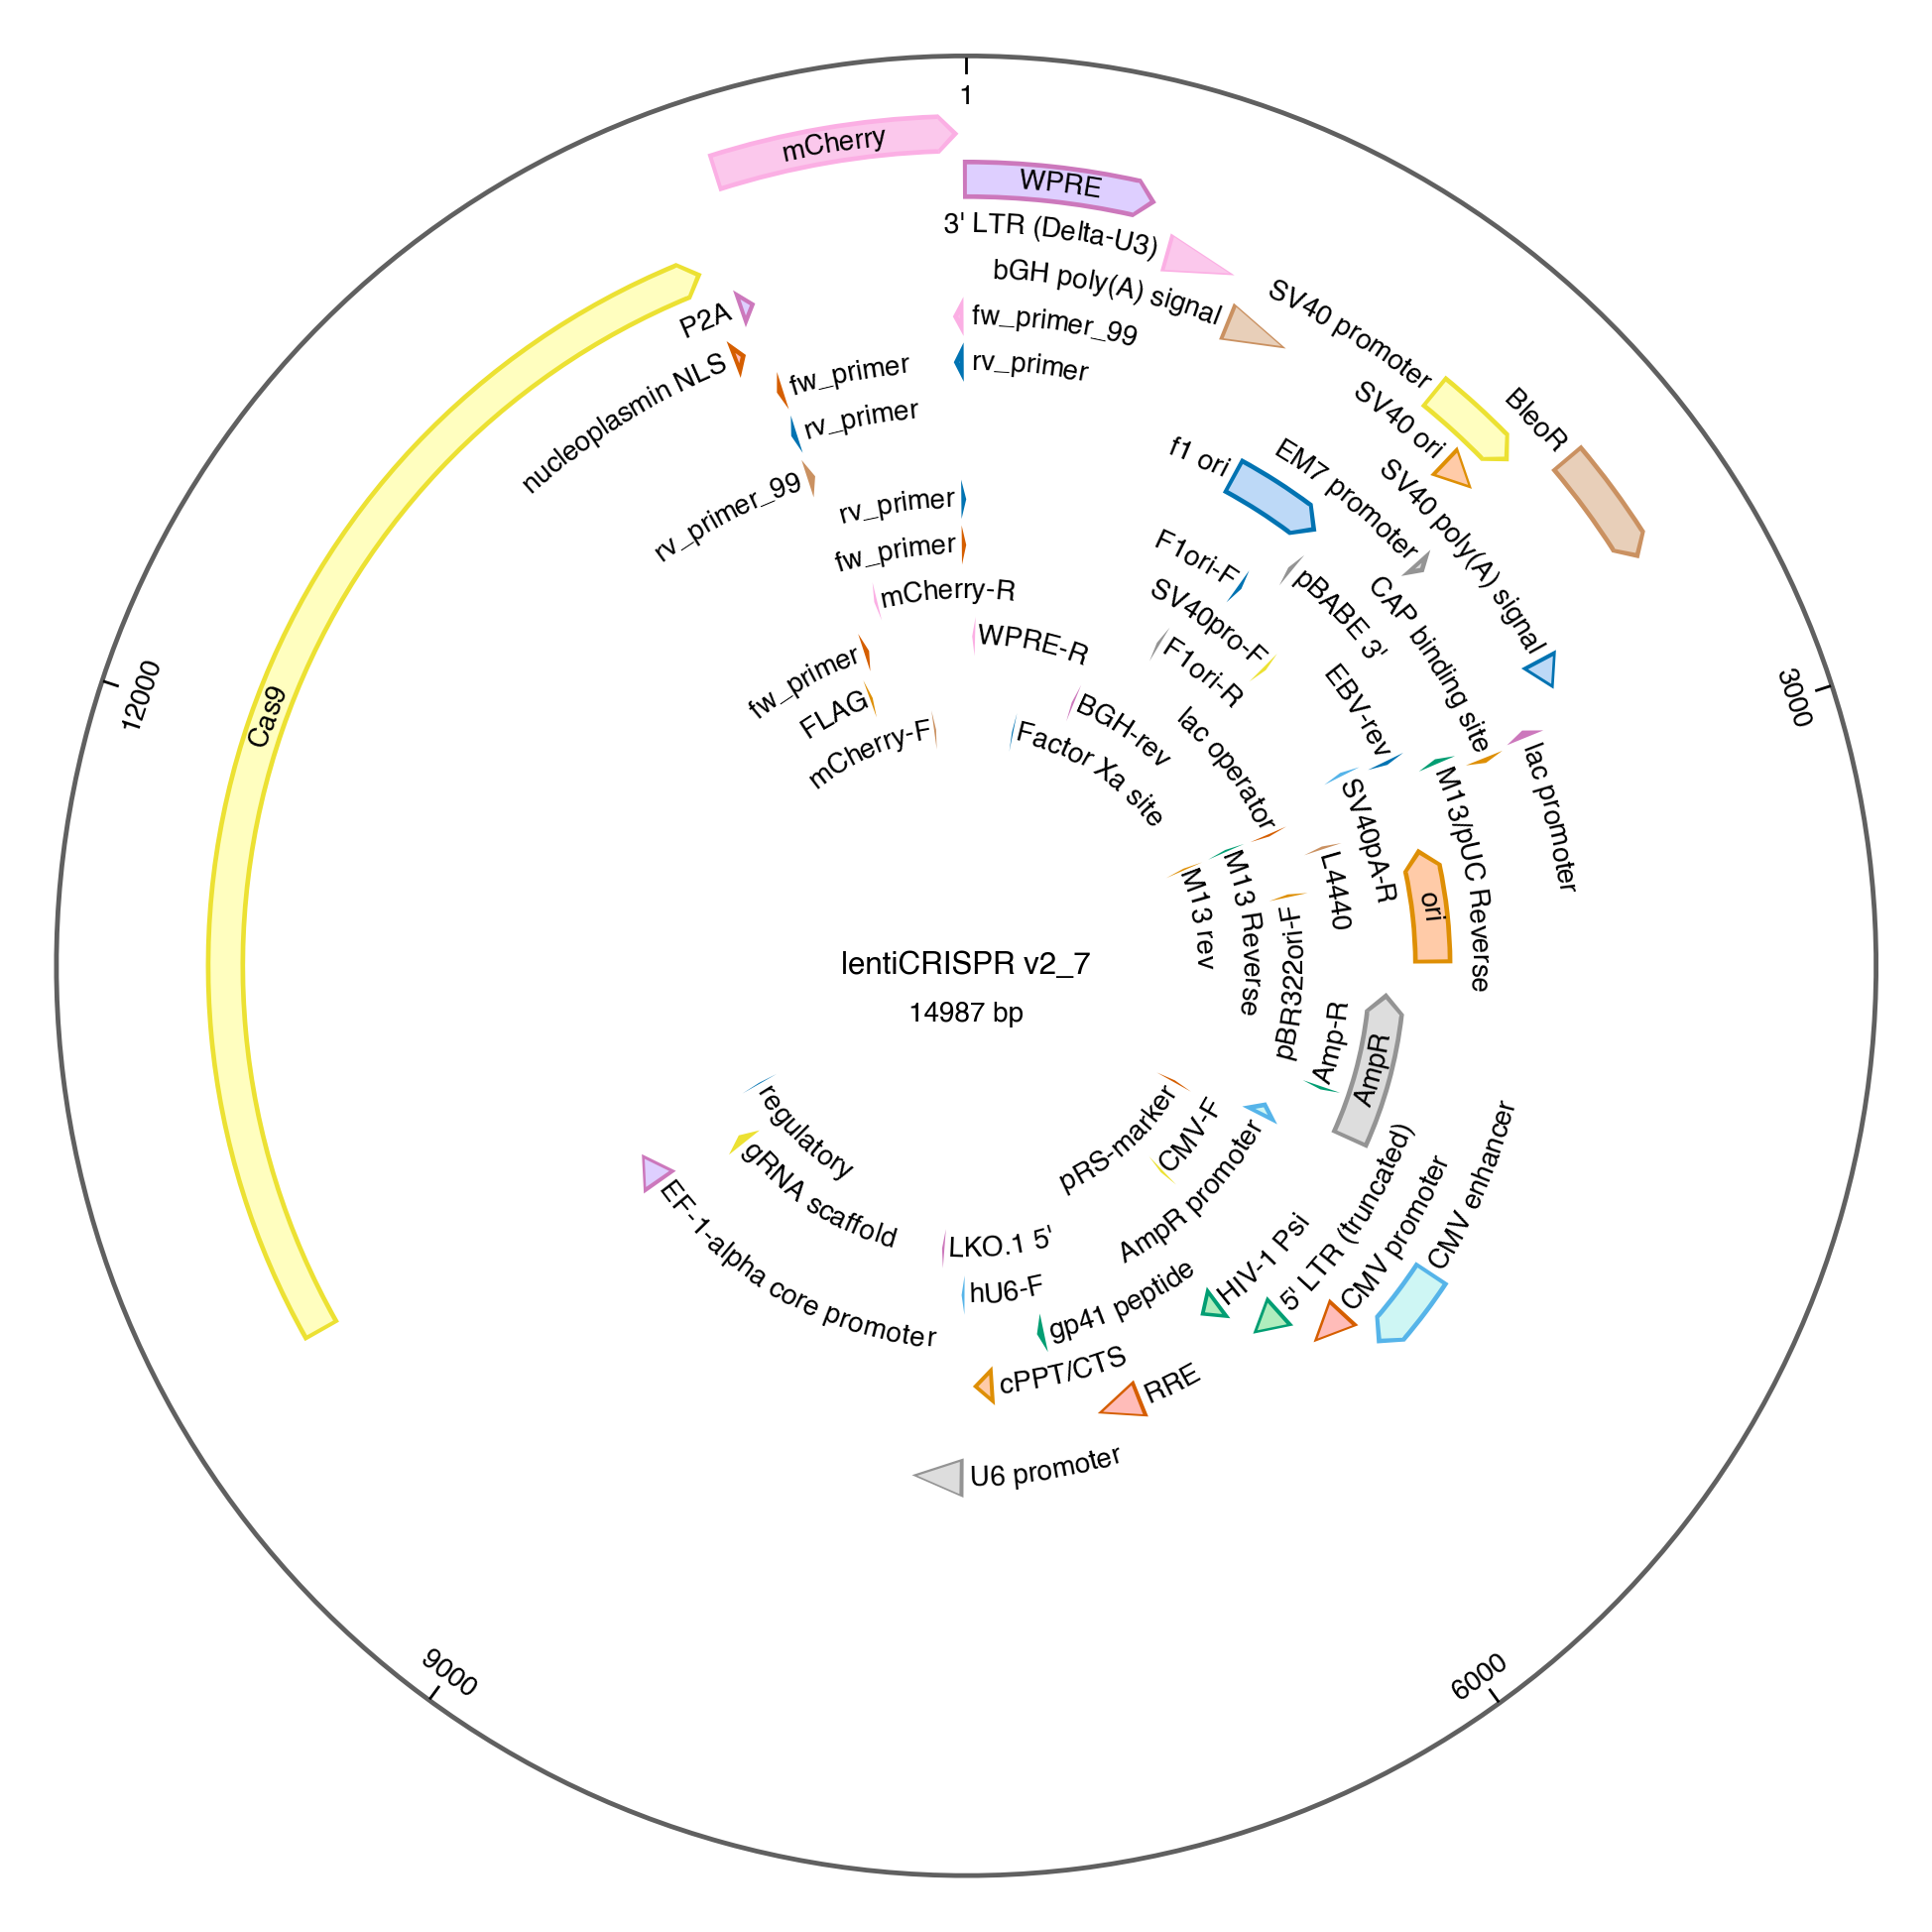

In [11]:
visualizemap(construct, map_view="circular")
#visualizemap(construct["Cas9", "mCherry"], seq=True, rcseq=True, linebreak=200)